In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [6]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv").loc[:,["date_time","holiday","temp", "traffic_volume"]]

In [7]:
df.head()

,date_time,holiday,temp,traffic_volume
0,2012-10-02 09:00:00,None,288.28,5545
1,2012-10-02 10:00:00,None,289.36,4516
2,2012-10-02 11:00:00,None,289.58,4767
3,2012-10-02 12:00:00,None,290.13,5026
4,2012-10-02 13:00:00,None,291.14,4918


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 4 columns):
date_time         48204 non-null object
holiday           48204 non-null object
temp              48204 non-null float64
traffic_volume    48204 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [9]:
# распознаем поле с датой как дату
df.date_time = pd.to_datetime(df.date_time)

In [10]:
# что там у нас в поле с праздниками
df.holiday.value_counts()

None                         48143
Labor Day                        7
New Years Day                    6
Christmas Day                    6
Martin Luther King Jr Day        6
Thanksgiving Day                 6
Veterans Day                     5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Columbus Day                     5
Washingtons Birthday             5
Name: holiday, dtype: int64

In [11]:
# преобразуем праздинки в флаг 0/1
df["holiday"] = (~(df.holiday =="None")).astype(int)

In [12]:
# убеждаемся, что пропусков в данных нет
df.isna().sum()

date_time         0
holiday           0
temp              0
traffic_volume    0
dtype: int64

In [13]:
# сортируем по дате
df.sort_values(by="date_time", inplace=True)

In [14]:
# посмотрим как праздники влияют на число пассажиров


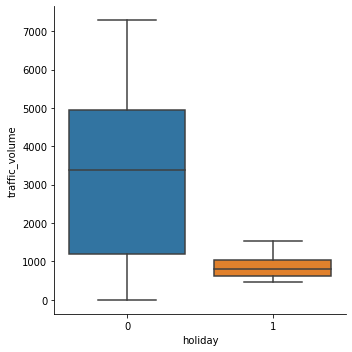

In [15]:
sns.catplot(x="holiday", y="traffic_volume", kind="box", data=df);

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


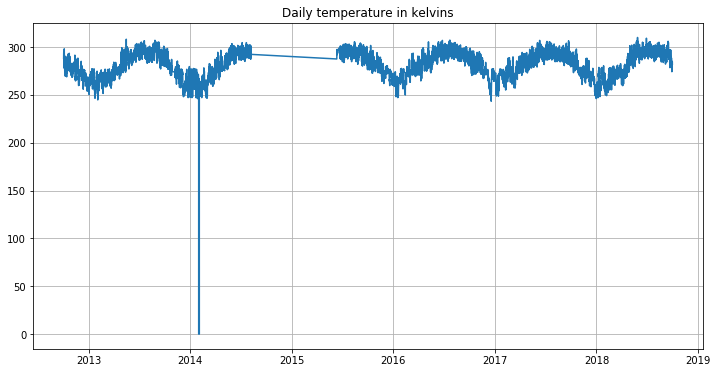

In [16]:
# погода
plt.figure(figsize=(12, 6))
plt.plot(df.date_time, df.temp)
plt.title('Daily temperature in kelvins')
plt.grid(True)
plt.show()

In [17]:
# Наблюдаем катаклизм в 14 году (абсолютный ноль - холодно) и отсутствуие данных примерно в 2015 году. Надо будет заполнять.
# Переведем в градусы цельсия для красоты и построим без выброса

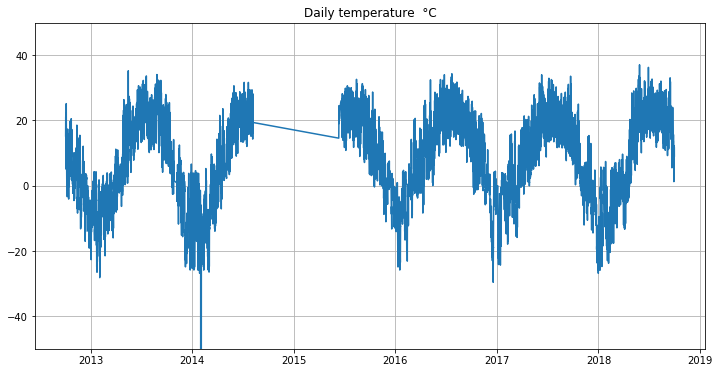

In [18]:
# погода в градусах цельсия
plt.figure(figsize=(12, 6))
plt.plot(df.date_time, df.temp - 273)
plt.title('Daily temperature  °C')
plt.ylim(-50,50)
plt.grid(True)
plt.show()

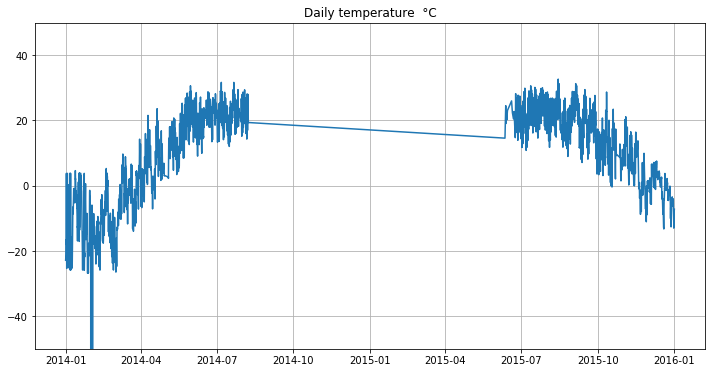

In [19]:
# посмотрим поближе участок с кривыми данными
_ = df[df.date_time.dt.year.isin([2014,2015])]
plt.figure(figsize=(12, 6))
plt.plot(_.date_time, _.temp - 273)
plt.title('Daily temperature  °C')
plt.ylim(-50,50)
plt.grid(True)
plt.show()


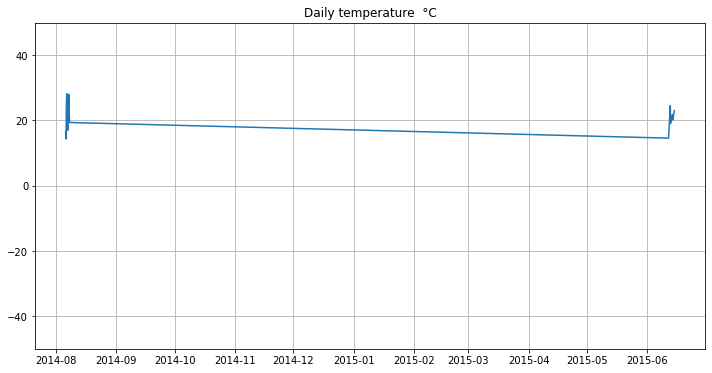

In [20]:
# еще поближе
_ = df[(df.date_time> pd.to_datetime('2014-08-06 00:00:00'))
      & (df.date_time< pd.to_datetime('2015-06-15 00:00:00'))
      ]
plt.figure(figsize=(12, 6))
plt.plot(_.date_time, _.temp - 273)
plt.title('Daily temperature  °C')
plt.ylim(-50,50)
plt.grid(True)
plt.show()


In [21]:
# определили, что криво заполнен по температуре у нас период с августа 2014 по середину июня 15 года

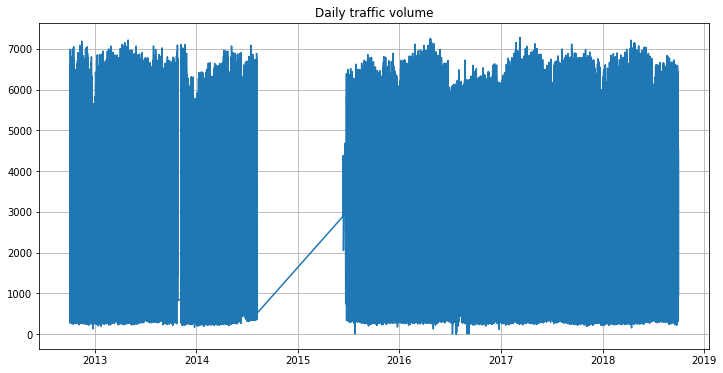

In [22]:
# построим целевую переменную 
plt.figure(figsize=(12, 6))
plt.plot(df.date_time, df.traffic_volume)
plt.title('Daily traffic volume')
plt.grid(True)
plt.show()

In [23]:
# Опять дыра в данных, примерно за тот же период

In [24]:
# данных для решения задачи у нас достаточно, поэтому отрежем кривую левую часть и не будем на ней учиться.
df_short = df[df.date_time.dt.year>2015]

In [25]:
# и еще разок построим графики

### Посмотрим на горизонте нескольких лет

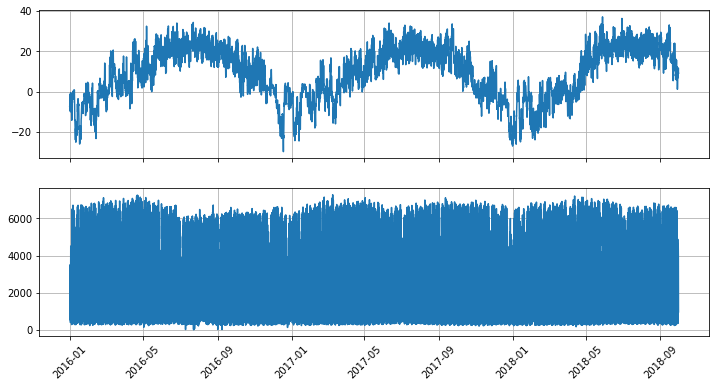

In [26]:
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12, 6))
ax1.plot(df_short.date_time, df_short.temp - 273)
ax1.grid(True)

ax2.plot(df_short.date_time, df_short.traffic_volume)
ax2.grid(True)
plt.xticks( rotation=45);

### Посмотрим на горизонте нескольких месяцев

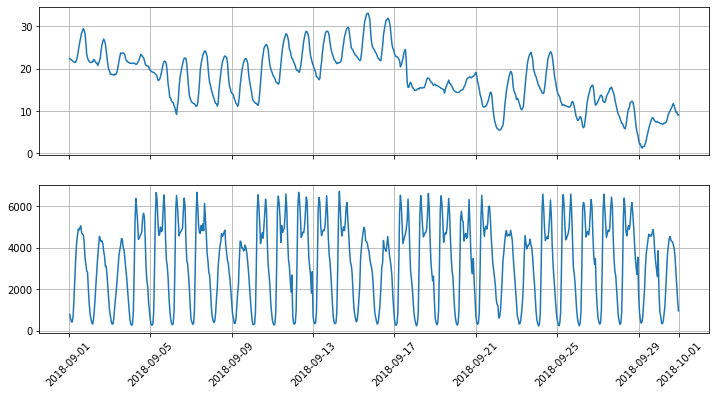

In [27]:
# графики сильно шумят. посмотрим более короткий отрезок времени
_ = df_short[(df_short.date_time> pd.to_datetime('2018-09-01 00:00:00'))]
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12, 6))
ax1.plot(_.date_time, _.temp - 273)
ax1.grid(True)
ax2.plot(_.date_time, _.traffic_volume)
ax2.grid(True)
plt.xticks( rotation=45);

### Посмотрим на горизонте нескольких недель

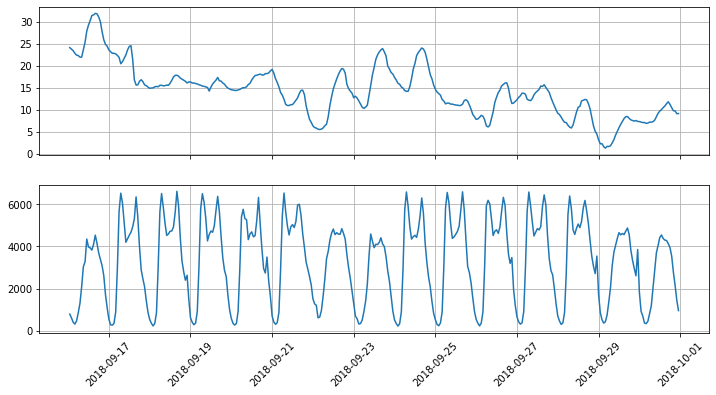

In [28]:
# графики сильно шумят. посмотрим более короткий отрезок времени
_ = df_short[(df_short.date_time> pd.to_datetime('2018-09-16 00:00:00'))]
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12, 6))
ax1.plot(_.date_time, _.temp - 273)
ax1.grid(True)
ax2.plot(_.date_time, _.traffic_volume)
ax2.grid(True)
plt.xticks( rotation=45);

### Посмотрим на горизонте нескольких дней

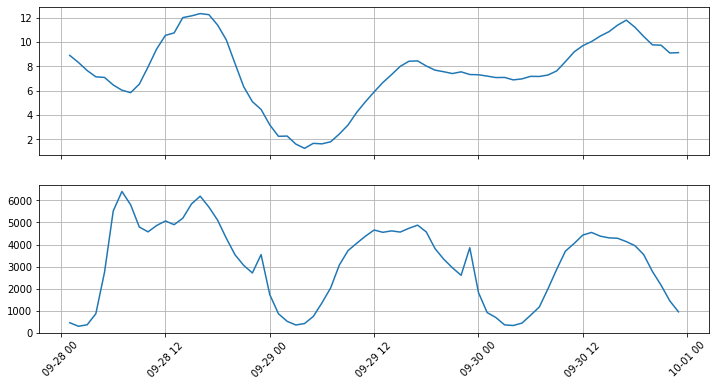

In [29]:
# графики сильно шумят. посмотрим более короткий отрезок времени
_ = df_short[(df_short.date_time> pd.to_datetime('2018-09-28 00:00:00'))]
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12, 6))
ax1.plot(_.date_time, _.temp - 273)
ax1.grid(True)
ax2.plot(_.date_time, _.traffic_volume)
ax2.grid(True)
plt.xticks( rotation=45);

In [30]:
# EDA почти закончился, а мы так и не заметили, что есть дубли в строчках и пропущенные отдельные периоды
# хорошо что в формулировке задачи об этом упомянули
# не заметили сами - проверяем напрямую

In [31]:
df_short.shape

(27860, 4)

In [32]:
df_short.drop_duplicates().shape

(23138, 4)

In [33]:
df_short.drop_duplicates(subset=["date_time"]).shape

(23084, 4)

In [34]:
# Видим, что дубли есть, более того они еще и заполнены разными значениями метрик

In [35]:
_ = df_short[df_short.duplicated(subset=("date_time"), keep=False)]
_[~_.duplicated(keep=False)]

,date_time,holiday,temp,traffic_volume
23590,2016-05-24 10:00:00,0,294.56,4652
23591,2016-05-24 10:00:00,0,294.88,4652
23594,2016-05-24 14:00:00,0,300.28,5398
23595,2016-05-24 14:00:00,0,300.18,5398
23598,2016-05-24 18:00:00,0,300.06,4611
...,...,...,...,...
29257,2016-12-18 14:00:00,0,251.23,3437
29266,2016-12-18 23:00:00,0,254.14,1033
29265,2016-12-18 23:00:00,0,253.93,1033
32425,2017-04-06 14:00:00,0,283.68,5446


In [36]:
# На глазок отличия несущественные, можно просто удалить лишние строчки и не задумываться о выборе строки

In [37]:
df_short_cleaned = df_short.drop_duplicates(subset="date_time")

In [38]:
# а теперь заполним пропущенные строчки

In [39]:
df_final = \
pd.merge(
    pd.Series(pd.date_range(df_short_cleaned.date_time.min(), df_short_cleaned.date_time.max(), freq='h'), name='date_time'),
    df_short_cleaned,
    how="left",
    on = "date_time"
).interpolate()

In [40]:
df_final.holiday.value_counts()

0.0    24068
1.0       28
Name: holiday, dtype: int64

In [41]:
# к счастью пропусков на границе праздник/не праздник не было, поэтому дробных значений не появилось

### Закончили EDA, начинаем готовиться к моделированию

In [42]:
# сгенерим фичи для обучения

In [43]:
df_final.loc[:,"mn"] = df_final.date_time.dt.month
df_final.loc[:,"wd"] = df_final.date_time.dt.dayofweek
df_final.loc[:,"hr"] = df_final.date_time.dt.hour

In [44]:
# разобъем на трэйн и тест
X_train = df_final.drop(columns="traffic_volume").head(df_final.shape[0]-24*7*2)
y_train = df_final["traffic_volume"].head(df_final.shape[0]-24*7*2)

X_test = df_final.drop(columns="traffic_volume").tail(24*7*2)
y_test = df_final["traffic_volume"].tail(24*7*2)

In [45]:
# сделаем функцию, которая нам будет красиво выводить результаты

from sklearn.metrics import mean_absolute_error
import matplotlib.dates as mdates

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))

def evaluate(title ,y_true, y_pred):
#     if y_true is pd.core.series.Series:
#         y_true = y_true.values
#     if y_pred is pd.core.series.Series:
#         y_pred = y_pred.values
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label="y_true")
    plt.title('{}. \n MAE - {:.2f}, MAPE - {:.2%}'.format(title, mae, mape))
    plt.plot(y_pred, label="y_pred")
    plt.grid(True)
#     plt.axis('tight')
#     plt.gformat_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.legend()
    plt.show()
    

In [42]:
# сделаем baseline
from sklearn.base import BaseEstimator
class baseline(BaseEstimator):
    def __init__(self, days_limit = None):
        self.model = None
        self.days_limit = days_limit
    def fit(self,X,y):
        if self.days_limit:
            _ = pd.concat([X,y],axis=1).tail(int(self.days_limit)*24)
        else:
            _ = pd.concat([X,y],axis=1)
        self.model = _.groupby(by=["wd", "hr"]).traffic_volume.mean().to_dict()
    def predict(self, X):
        return X.loc[:, ["wd", "hr"]].apply(lambda x:self.model.get((x[0],x[1])),axis=1)


In [43]:
# обучим baseline и посмотрим на метрики
bl = baseline()
bl.fit(X_train, y_train)

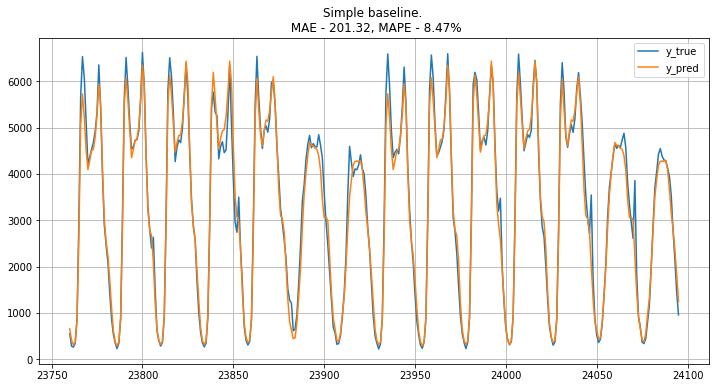

In [44]:
evaluate("Simple baseline", y_test, bl.predict(X_test))

In [45]:
# подберем лучшие параметры для базовой линии =)

In [46]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer

search = GridSearchCV(estimator=baseline(),
                      cv=TimeSeriesSplit(n_splits=10),
                      param_grid={"days_limit": np.arange(7,7*100,7)}, n_jobs=-1, 
                      scoring=make_scorer(mean_absolute_error, greater_is_better=False))

search.fit(X_train, y_train);

Wall time: 40.4 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan, estimator=baseline(days_limit=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'days_limit': array([  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,  91,
        98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182,
       189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273,
       280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357, 364,
       371, 378, 385, 392, 399, 406, 413, 420, 427, 434, 441, 448, 455,
       462, 469, 476, 483, 490, 497, 504, 511, 518, 525, 532, 539, 546,
       553, 560, 567, 574, 581, 588, 595, 602, 609, 616, 623, 630, 637,
       644, 651, 658, 665, 672, 679, 686, 693])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

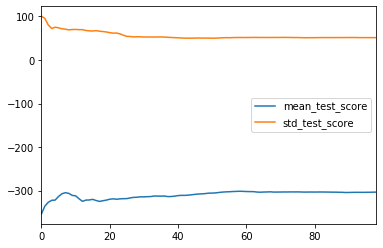

In [47]:
pd.DataFrame(search.cv_results_).loc[:,["mean_test_score","std_test_score"]].plot()

In [48]:
# судя по кросс-валидации неплохое значение для нашей модельки находится в районе 413 дней

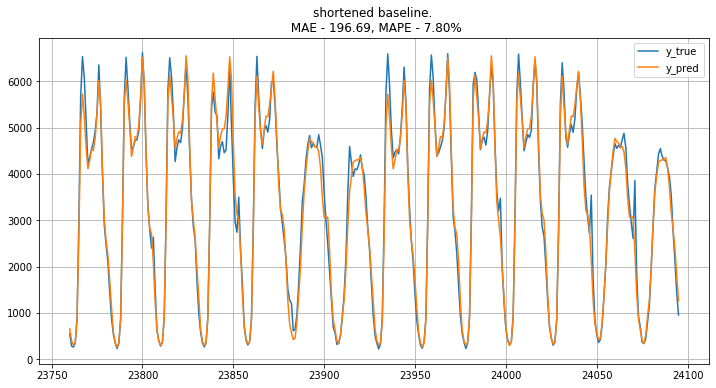

In [49]:
bl2 = baseline(days_limit=413)
bl2.fit(X_train, y_train)
evaluate("shortened baseline", y_test, bl2.predict(X_test))

In [50]:
# немножно приросли в качестве

### попробуем модель хольта-винтерса

In [51]:
# готовый класс из лекции
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [52]:

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [53]:
%%time
from scipy.optimize import minimize
data = y_train # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_error, 24*7), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.0005325682785135566 0.0005147570498714171 0.00013963200206079662
Wall time: 3min 51s


In [54]:
# тренируем модельку на найденные параметры
model = HoltWinters(data, slen = 24*7, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 24*14, scaling_factor = 3)
model.triple_exponential_smoothing()

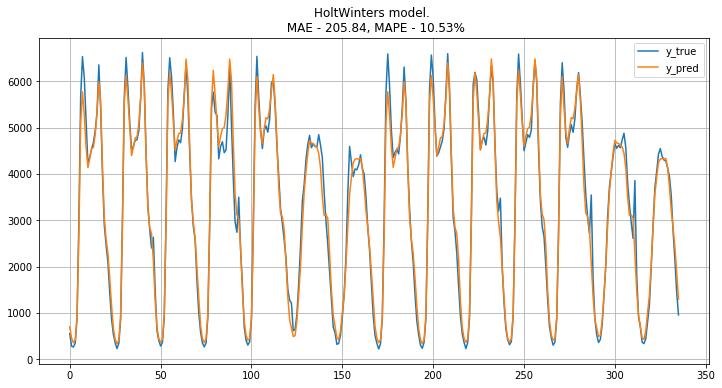

In [55]:
evaluate("HoltWinters model", y_test.values, np.array(model.result[-24*14:]))

In [56]:
# качество по модели Хольта Винтерса чуть ниже, чем у базовой линии

### попробуем SARIMA

In [57]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [58]:
# позаимствуем код из лекции
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, method="ols")
        plt.tight_layout()

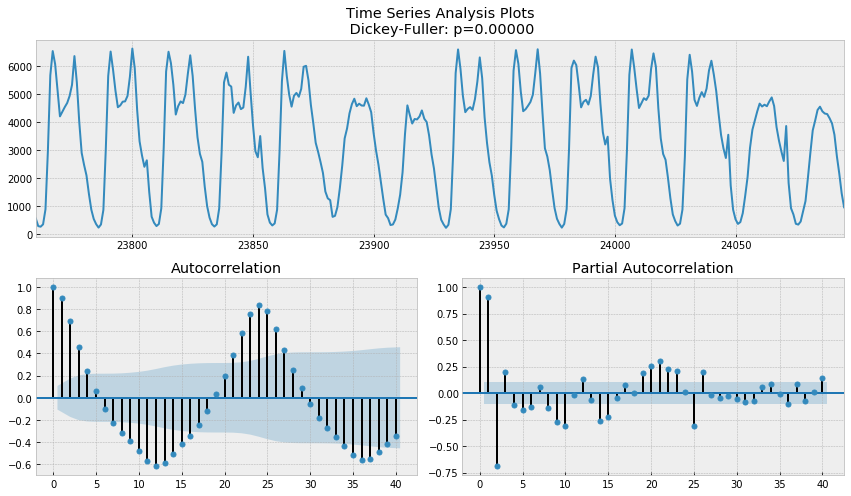

In [59]:
tsplot(y_test, lags=40)

In [60]:
# тест Дикки-Фуллера пройден, ряд с стационарен

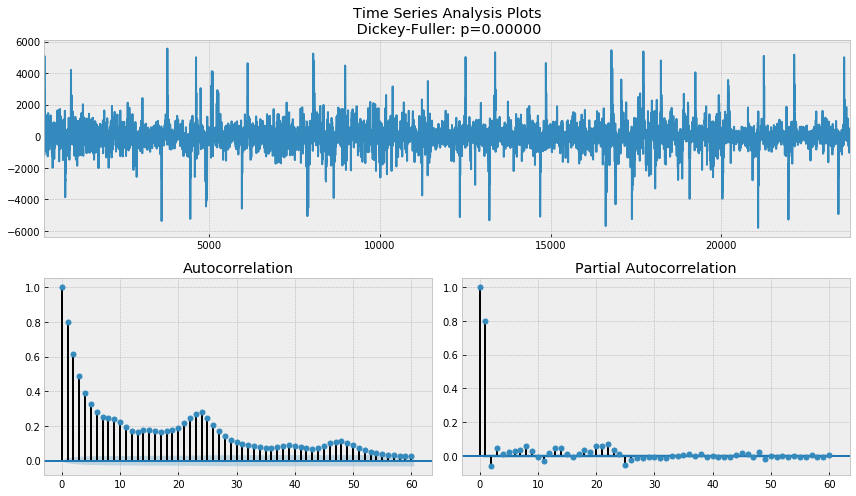

In [74]:
# вычтем сезонность
data_diff = y_train - y_train.shift(24*7)
# tsplot(data_diff[24*7:], lags=24*7)
tsplot(data_diff[24*7:], lags=60)

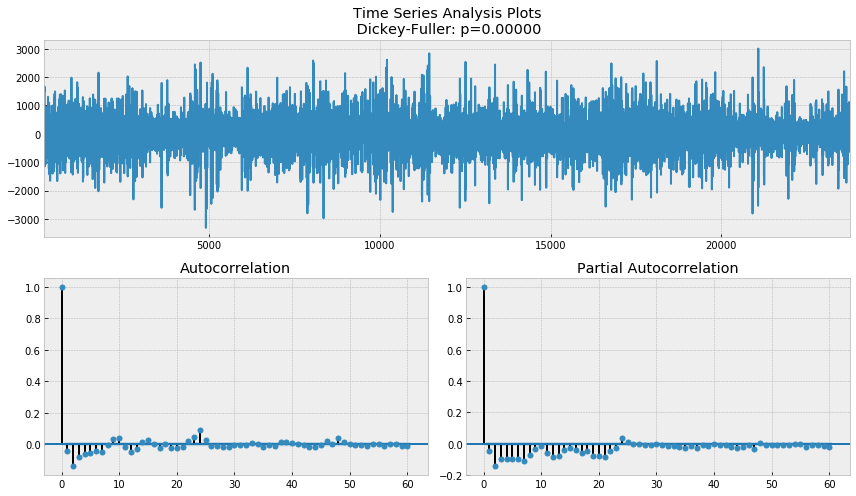

In [75]:
# вычтем ряд сам из себя с шагом 1
data_diff = data_diff - data_diff.shift(1)
# tsplot(data_diff[24*7+1:], lags=24*7)
tsplot(data_diff[24*7+1:], lags=60)

In [63]:
# пересмотрел лекцию несколько  раз, но так и не догнал, как получить примерные значения из графиков.
# решил потратить больше времени и перебрать больше вариантов
from itertools import product
ps = range(0, 7)
d=1 
qs = range(0, 7)
Ps = range(0, 7)
D=1 
Qs = range(0, 7)
s = 24*7 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

2401

In [64]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(y_train[-8*24:], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except Exception as e:
            print(e)
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    print(results)
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [65]:
%%time
# первая попытка перебора потребовала бы примерно 65 часов. в связи с этим решил ограничить длину врееменого ряда 8 неделями
from tqdm.notebook import tqdm
result_table = optimizeSARIMA(parameters_list, d, D, s)

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1014: RuntimeWarning: invalid value encountered in less
  params_variance = np.atleast_1d(max(np.array(params_variance), 1e-10))
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Non-positive-definite forecast error covariance matrix encountered at period 178
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Non-positive-definite forecast error covariance matrix encountered at period 178
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\t

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Schur decomposition solver error.
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa

maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packa


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


maxlag should be < nobs

[[(0, 0, 0, 0), 332.5734506154309], [(0, 1, 0, 0), 329.9527571815205], [(0, 2, 0, 0), 331.47865975821344], [(0, 3, 0, 0), 331.27456966161964], [(0, 4, 0, 0), 332.2875935522793], [(0, 5, 0, 0), 337.5299527283444], [(0, 6, 0, 0), nan], [(1, 0, 0, 0), 332.63661271796286], [(1, 1, 0, 0), 331.81515127912945], [(1, 2, 0, 0), 332.61610961576616], [(1, 3, 0, 0), 333.24880299391106], [(1, 4, 0, 0), 331.96544838156916], [(1, 5, 0, 0), 339.99442040021046], [(2, 0, 0, 0), 329.63134316097836], [(2, 1, 0, 0), 331.5227538464819], [(2, 2, 0, 0), 328.2350333374439], [(2, 3, 0, 0), 330.23484633555216], [(2, 4, 0, 0), 333.43863163075616], [(2, 5, 0, 0), 352.95873966273655], [(3, 0, 0, 0), 331.5021050755713], [(3, 1, 0, 0), 333.50202116572655], [(3, 2, 0, 0), 330.2351176312122], [(3, 3, 0, 0), 332.24183563194646], [(3, 4, 0, 0), 334.2352290631225], [(4, 0, 0, 0), 333.50148150764727], [(4, 1, 0, 0), 335.3410142025416], [(4, 2, 0, 0), 332.7544068001907], [(4, 3, 0, 0), 334.242236892

In [66]:
result_table.head()

,parameters,aic
0,"(2, 2, 0, 0)",328.235033
1,"(2, 0, 0, 0)",329.631343
2,"(0, 1, 0, 0)",329.952757
3,"(2, 3, 0, 0)",330.234846
4,"(3, 2, 0, 0)",330.235118


In [77]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(y_train.tail(8*24), order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                 
Dep. Variable:                      traffic_volume   No. Observations:                  192
Model:             SARIMAX(2, 1, 2)x(0, 1, 0, 168)   Log Likelihood                -159.118
Date:                             Sun, 05 Apr 2020   AIC                            328.235
Time:                                     18:23:25   BIC                            333.913
Sample:                                          0   HQIC                           329.663
                                             - 192                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1707      0.245      0.697      0.486      -0.310       0.651
ar.L2         -0.7635      

In [83]:
# эксперимент с sarima не удался. скорее всего это связано с наличием двух трендов одновременно - суточного и недельного

In [80]:
%%time
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(24, 24*7))
model = estimator.fit(y_train)


Wall time: 2h 29min 30s


In [81]:
%%time
# Forecast 365 days ahead
y_forecast = model.forecast(steps=24*14)

Wall time: 12 ms


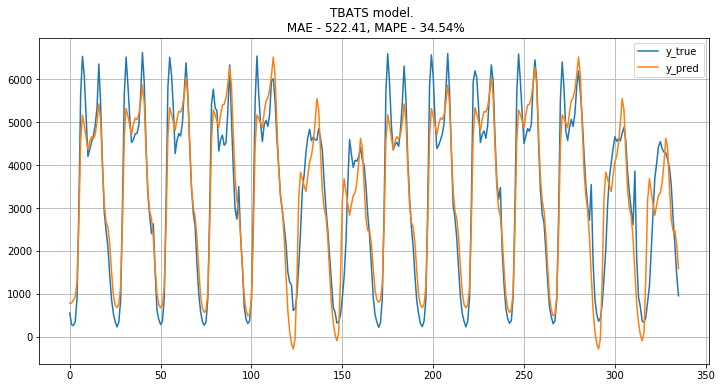

In [82]:
evaluate("TBATS model", y_test.values, np.array(y_forecast))

In [ ]:
# у TBATS качество вышло так себе

### поработаем теперь с алгоритмами машинного обучения

In [85]:
# готовим датасет

In [363]:
# визуализация для коэффициентовмодели
from sklearn.model_selection import cross_val_score

def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [364]:
data = df_final.copy()

In [365]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag{}".format(i)] = data.traffic_volume.shift(i)

In [366]:
# data = pd.get_dummies(data, prefix=["wd_", "hr_"], columns=["wd","hr"])
data['is_weekend'] = data.wd.isin([5,6])*1
data = pd.get_dummies(data, prefix=["wd"], columns=["wd"],drop_first=False)


In [367]:
# разобъем на трэйн и тест
X_train = data.dropna().drop(columns=["date_time", "traffic_volume"]).head(data.shape[0]-24*7*2)
y_train = data["traffic_volume"].head(data.shape[0]-24*7*2)

X_test = data.drop(columns=["date_time", "traffic_volume"]).tail(24*7*2)
y_test = data["traffic_volume"].tail(24*7*2)

In [368]:
# columns_to_drop = ["wd_1", "wd_2", "wd_3", "hr"]
# X_train.drop(columns=columns_to_drop, inplace = True)
# X_test.drop(columns=columns_to_drop, inplace = True)

In [369]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = [name for name in X_train.columns if "lag" in name]
scaler = StandardScaler()
scaler.fit(X_train.loc[:,columns_to_scale])
X_train.loc[:,columns_to_scale] = scaler.transform(X_train.loc[:,columns_to_scale])
X_test.loc[:,columns_to_scale] = scaler.transform(X_test.loc[:,columns_to_scale])

In [370]:
for wd in range(7):
    X_train["week_{}_24_lag".format(wd)] = X_train["lag24"] * X_train["wd_{}".format(wd)]
    X_test["week_{}_24_lag".format(wd)] = X_test["lag24"] * X_test["wd_{}".format(wd)]


In [371]:
X_train.drop(columns="lag24", inplace=True)
X_test.drop(columns="lag24", inplace=True)

In [372]:
# X_train = X_train.loc[:,["lag24", "is_weekend","wd_0"]]
# X_test = X_test.loc[:,["lag24", "is_weekend","wd_0"]]

# X_train.loc[X_train.wd_0==1,"wd_0"] = 2000
# X_test.loc[X_test.wd_0==1,"wd_0"] = 2000


In [374]:
X_train = X_train.loc[:,['week_0_24_lag',
       'week_1_24_lag', 'week_2_24_lag', 'week_3_24_lag', 'week_4_24_lag',
       'week_5_24_lag', 'week_6_24_lag']]

X_test = X_test.loc[:,['week_0_24_lag',
       'week_1_24_lag', 'week_2_24_lag', 'week_3_24_lag', 'week_4_24_lag',
       'week_5_24_lag', 'week_6_24_lag']]

In [375]:
%%time
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
lr = LassoCV(cv=TimeSeriesSplit(n_splits=20), verbose=False, 
#              n_alphas=1000, 
             normalize=True, selection ="random",
             max_iter=10000)
# lr = RidgeCV(cv=TimeSeriesSplit(n_splits=20), alphas =np.logspace(0.0001, 100, 100))
# lr = LassoCV( n_jobs=-1, verbose=True)
# lr = LinearRegression()
# lr.fit(X_test,y_test)
lr.fit(X_train,y_train)


Wall time: 468 ms


LassoCV(alphas=None, copy_X=True,
        cv=TimeSeriesSplit(max_train_size=None, n_splits=20), eps=0.001,
        fit_intercept=True, max_iter=10000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='random', tol=0.0001, verbose=False)

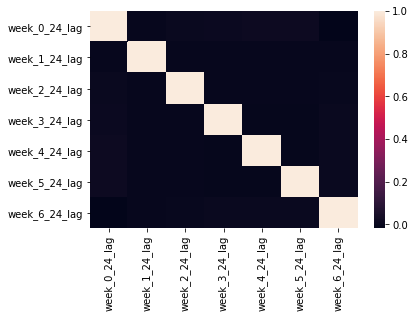

In [376]:
sns.heatmap(X_train.corr())

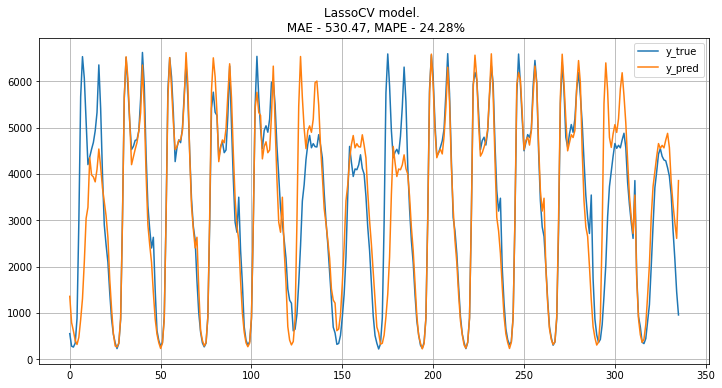

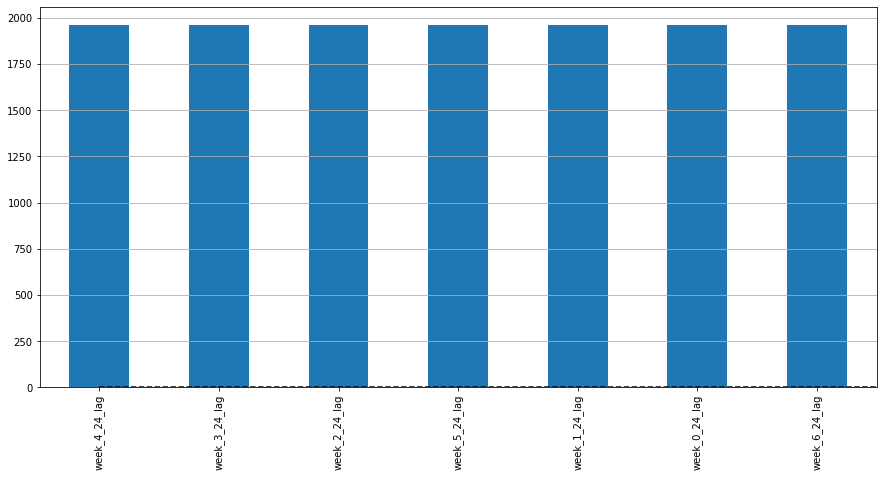

In [383]:
evaluate("LassoCV model", y_test.values, lr.predict(X_test))
plotCoefficients(lr)

In [339]:
coefs = pd.DataFrame(lr.coef_, X_train.columns)
coefs.columns = ["coef"]
coefs.sort_values(by="coef")

,coef
lag23,-7.329274e-12
lag12,-3.259292e-12
lag15,-2.901948e-12
lag20,-2.814736e-12
lag17,-2.408476e-12
lag10,-1.327522e-12
lag8,-1.201851e-12
wd_0,-6.475974e-13
wd_5,-2.813749e-13
lag19,-2.480993e-13


In [360]:
res = []
for x in np.linspace(14*24, X_train.shape[0]):
    _ = LinearRegression()
    _.fit(X_train[-int(x):], y_train[-int(x):])
    mape = mean_absolute_percentage_error(y_test, _.predict(X_test))
    res.append({"records":int(x), "mape":mape})

In [382]:
pd.DataFrame(res)

,records,mape
0,336,0.242738
1,814,0.242738
2,1292,0.242738
3,1770,0.242738
4,2248,0.242738
5,2726,0.242738
6,3204,0.242738
7,3682,0.242738
8,4160,0.242738
9,4638,0.242738


In [381]:
X_train.to_excel("x_train.xlsx")
X_test.to_excel("x_test.xlsx")
y_train.to_excel("y_train.xlsx")
y_test.to_excel("y_test.xlsx")